In [41]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [37]:
N0 = 1
N1 = 64
F1 = 9
N2 = 32
F2 = 1
N3 = 1
F3 = 5
H = 255
W = 255

#load data
conv1_w = np.array(np.fromfile(open("./weights/conv1_weights_3x_flp.bin", "r"), dtype=np.single))
conv1_b = np.array(np.fromfile(open("./weights/conv1_biases_3x_flp.bin", "r"), dtype=np.single))
conv2_w = np.array(np.fromfile(open("./weights/conv2_weights_3x_flp.bin", "r"), dtype=np.single))
conv2_b = np.array(np.fromfile(open("./weights/conv2_biases_3x_flp.bin", "r"), dtype=np.single))
conv3_w = np.array(np.fromfile(open("./weights/conv3_weights_3x_flp.bin", "r"), dtype=np.single))
conv3_b = np.array(np.fromfile(open("./weights/conv3_biases_3x_flp.bin", "r"), dtype=np.single))


In [173]:
step_sizes = {"uniform":1.0, "gaussian": 1.596, "laplacian": 1.414, "gamma": 1.154}

def generate_plot(x, title):
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    if (x.max() - x.min()) == 0:
        bins = 1
    else :
        bins = round((x.max() - x.min()) / bin_width)
    plt.hist(x, bins=bins)
    plt.title(title + " distribution")
    plt.xlabel("values")
    plt.ylabel("frequencies")
    plt.show()

def get_fractional_bits(step_size, bit_length, std):
    step_size_new = step_size/bit_length
    s = step_size_new*std
    fractional_bits = -math.ceil(np.log2(s))
    return fractional_bits

def print_stats(data, title, distribution, spread_factor):
    std = spread_factor*(np.std(data))+ 0.00000000001
    print(title, " standard deviation: ", std)
    step_size = step_sizes[distribution]
    fractional_bits = [get_fractional_bits(step_size, x, std) for x in range(4, 33)]
    bits = [x for x in range(4,33)]
    plt.plot(bits, fractional_bits)
    plt.title(title + " fractional bits required")
    plt.ylabel("fractional bits")
    plt.xlabel("total bits")
    plt.show()
    print(title, "fractional bits ", fractional_bits)
    print("min value: ", data.min().astype(str))
    print("max value: ", data.max().astype(str))


In [166]:
golden_mses = [2.17875e-13, 0.00161402, 0.00316839, 0.00237435, 0.00206895, 0.000454178, 0.00184747, 0.000266235, 0.000822305, 0.00193997, 0.00159024, 0.00044792, 0.0011378, 0.00171135 ]



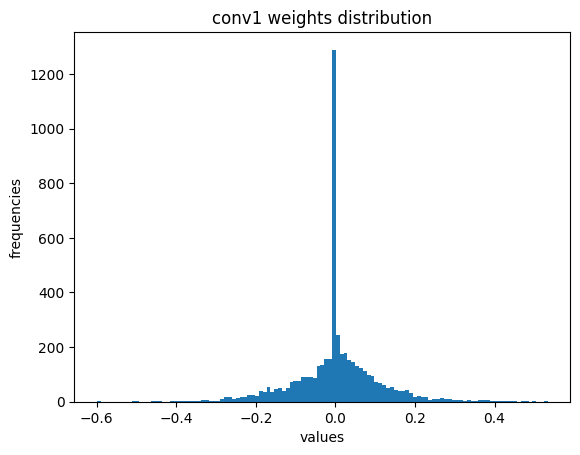

conv1 weights
conv1 weights  standard deviation:  0.10846465081976486


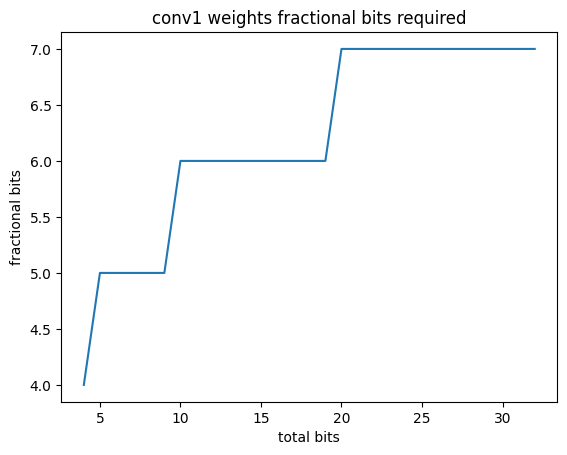

conv1 weights fractional bits  [4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
min value:  -0.5994025
max value:  0.534076


In [174]:
#conv1 weights
title = "conv1 weights"
generate_plot(conv1_w, title)
print(title)
print_stats(conv1_w, title, "laplacian",1)

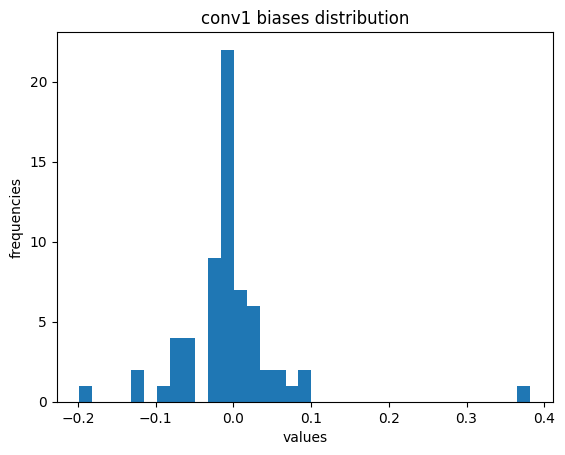

conv1 biases
conv1 biases  standard deviation:  0.2058997079830034


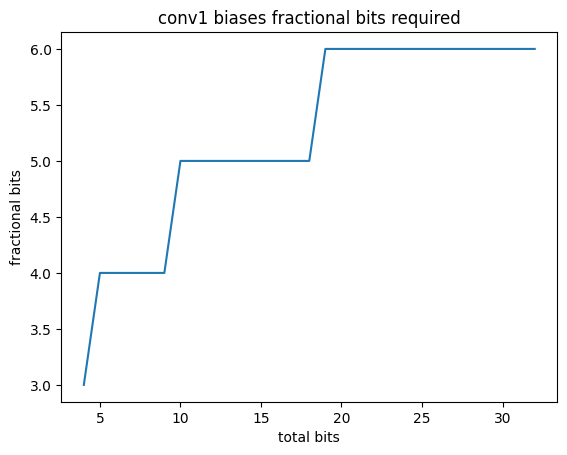

conv1 biases fractional bits  [3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
min value:  -0.19804245
max value:  0.38209084


In [176]:
title = "conv1 biases"
generate_plot(conv1_b, title)
print(title)
print_stats(conv1_b, title, "laplacian", 3)

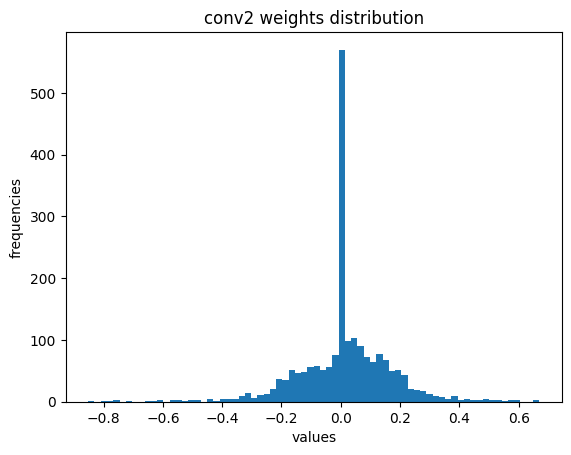

conv2 weights
conv2 weights  standard deviation:  0.4726603925328119


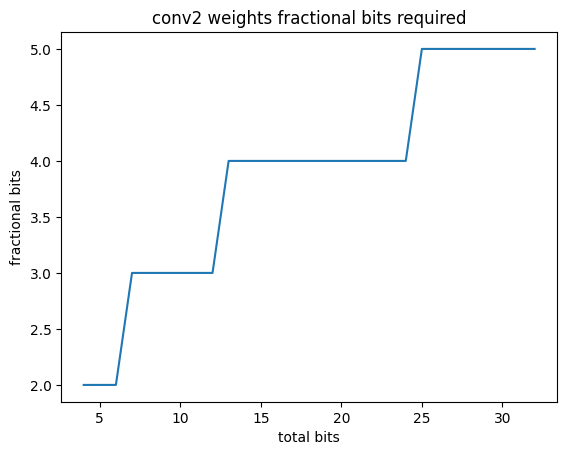

conv2 weights fractional bits  [2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5]
min value:  -0.85179186
max value:  0.668786


In [178]:
title = "conv2 weights"
generate_plot(conv2_w, title)
print(title)
print_stats(conv2_w, title, "gaussian", 3)

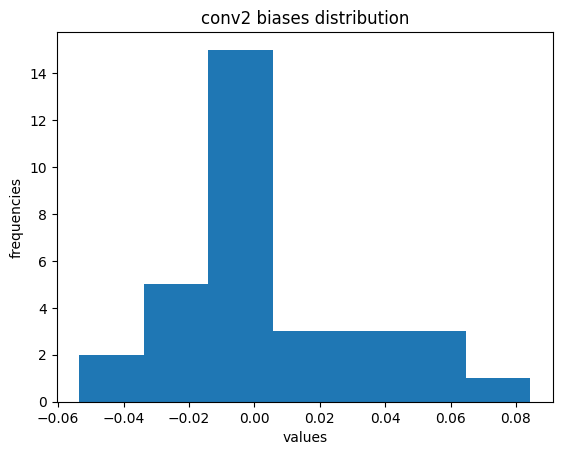

conv2 biases
conv2 biases  standard deviation:  0.028743281970487367


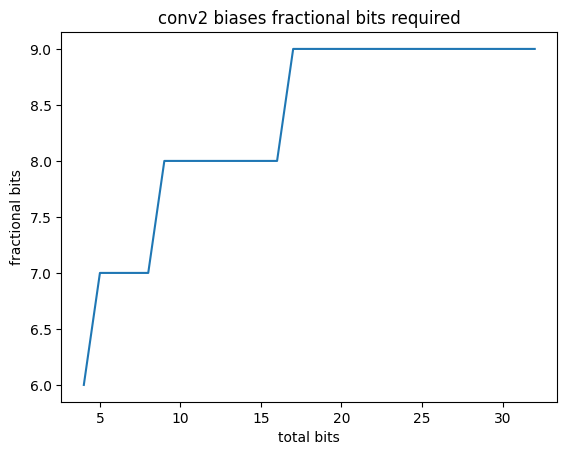

conv2 biases fractional bits  [6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
min value:  -0.05349957
max value:  0.08442124


In [179]:
title = "conv2 biases"
generate_plot(conv2_b, title)
print(title)
print_stats(conv2_b, title, "gamma", 1)

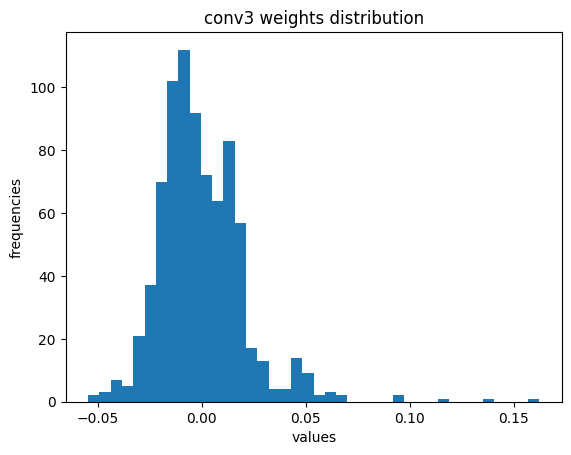

conv3 weights
conv3 weights  standard deviation:  0.06279421226190163


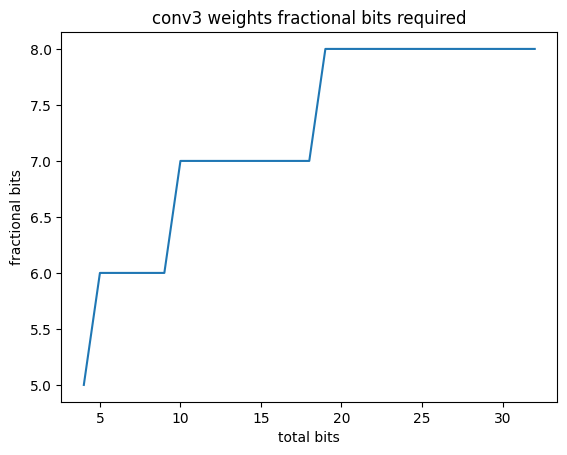

conv3 weights fractional bits  [5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
min value:  -0.05459739
max value:  0.16221903


In [181]:
title = "conv3 weights"
generate_plot(conv3_w, title)
print(title)
print_stats(conv3_w, title, "gamma", 3)

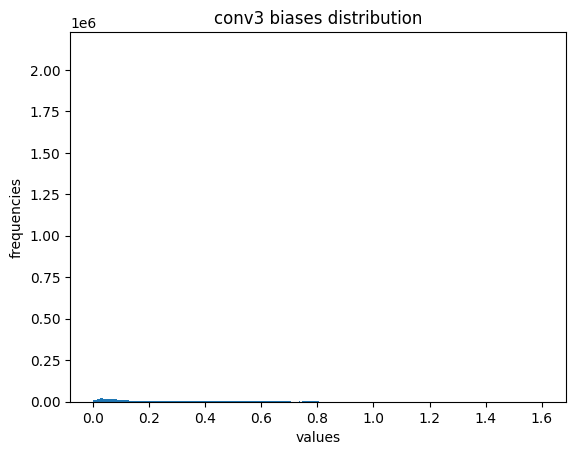

conv3 biases
conv3 biases  standard deviation:  0.2578163743119104


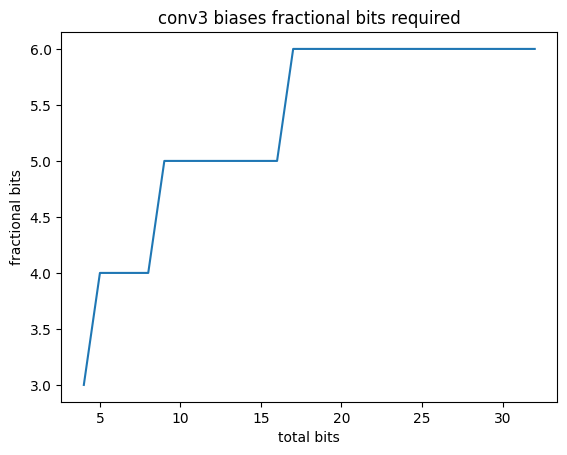

conv3 biases fractional bits  [3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
min value:  0.0
max value:  1.605586


In [183]:
title = "conv3 biases"
generate_plot(conv3_b, title)
print(title)
print_stats(conv3_b, title, "uniform", 1)

In [146]:
conv1_i = np.array(np.fromfile(open("./test/set5/butterfly_3x_CONV1_flp.bin", "r"), dtype=np.uint8))
conv1_i = np.array([x/255 for x in conv1_i])

conv1 inputs
conv1 inputs  standard deviation:  0.8605627339012178
conv1 inputs fractional bits  3
min value:  0.0
max value:  1.0


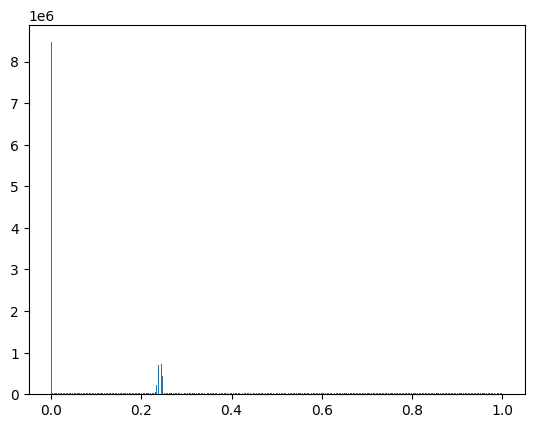

In [147]:
title = "conv1 inputs"
generate_plot(conv1_i)
print(title)
print_stats(conv1_i, title, "gamma",9)

In [ ]:
##TESTING CONV1 WEIGHTS
results_4_total_4_fractional = [0.261683, 0.228759, 0.263532, 0.242265, 0.237293, 0.123008, 0.182598, 0.390415, 0.23623, 0.186701, 0.258253, 0.272667, 0.497067, 0.220208]
results_10_total_6_fractional = [0.058442, 0.0471704, 0.0529794, 0.0522399, 0.0486507, 0.0242804, 0.0407981, 0.0732622, 0.0478325, 0.0396395, 0.0584566, 0.0536709, 0.0969046, 0.0510876]
results_20_total_7_fractional = [0.0155353, 27.3618, 24.8997, 25.2317, 26.3, 32.6794, 25.6995, 33.2014, 29.1689, 26.0613, 24.5799, 32.0454, 26.6842, 24.7423]
results_15_total_13_fractional = [3.03946e-006, 0.00161698, 0.00316835, 0.00237365, 0.00207069, 0.00045507, 0.00185109, 0.000268373, 0.000824564, 0.00194434, 0.0015938, 0.000449562 , 0.00114592, 0.00171565]
results_15_total_1_fractional = [7.65713e-007, 0.00161526 , 0.00316824 , 0.00237319 , 0.00206961 , 0.000454542, 0.00184861 , 0.000267022, 0.000823149, 0.00194194 , 0.00159126 , 0.000448519, 0.00114081 , 0.00171298 ,]
results_12_total_1_fractional = [4.983302e-005, 0.00163492 ,0.00317322 ,0.00240671 ,0.00208849 ,0.000460812,0.00189026 ,0.000288256,0.000847328,0.00197176 ,0.0016392  ,0.000463455,0.00120978 ,0.00176407 ,]

In [ ]:
#TESTING MSE FIRST LOT
MSES = [6.76643e-005, 0.00161402, 0.00316839, 0.00242199]